In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

df_city = pd.read_csv(city_data_to_load)
df_ride = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

df = pd.merge(df_city, df_ride, how='outer', on='city') 

# Display the data table for preview

df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
##Average Fare ($) Per City

avg_fare = df[['city','fare','type']].set_index('type')

avg_fare_urban = avg_fare.loc['Urban']
avg_fare_urban = avg_fare_urban.groupby('city').mean()

avg_fare_suburban = avg_fare.loc['Suburban']
avg_fare_suburban = avg_fare_suburban.groupby('city').mean()

avg_fare_rural = avg_fare.loc['Rural']
avg_fare_rural = avg_fare_rural.groupby('city').mean()

##Total Number of Rides Per City
total_rides = df[['city', 'type', 'ride_id']].set_index('type')

total_rides_urban = total_rides.loc['Urban']
total_rides_urban = total_rides_urban.groupby('city').count()

total_rides_suburban = total_rides.loc['Suburban']
total_rides_suburban = total_rides_suburban.groupby('city').count()

total_rides_rural = total_rides.loc['Rural']
total_rides_rural = total_rides_rural.groupby('city').count()

# ##Total Number of Drivers Per City
total_drivers = df[['city', 'driver_count', 'type']].drop_duplicates('city')
total_drivers = total_drivers.set_index('type')

total_drivers_urban = total_drivers.loc['Urban'].set_index('city')
total_drivers_suburban = total_drivers.loc['Suburban'].set_index('city')
total_drivers_rural = total_drivers.loc['Rural'].set_index('city')

total_drivers_urban = total_drivers_urban.sort_values('city')
total_drivers_suburbran = total_drivers_suburban.sort_values('city')
total_drivers_rural = total_drivers_rural.sort_values('city')

## Bubble Plot of Ride Sharing Data

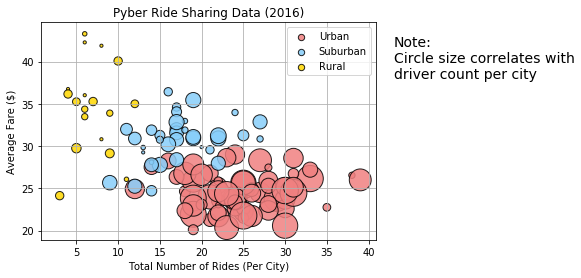

In [3]:
alpha=.85

urban = plt.scatter(total_rides_urban, avg_fare_urban, s=total_drivers_urban*10, color='lightcoral', alpha=alpha, edgecolor='black')
suburban = plt.scatter(total_rides_suburban, avg_fare_suburban, s=total_drivers_suburban*10, color='lightskyblue', alpha=alpha, edgecolor='black')
rural = plt.scatter(total_rides_rural, avg_fare_rural, s=total_drivers_rural*10, color='gold', alpha=alpha, edgecolor='black')

plt.title('Pyber Ride Sharing Data (2016)')
lgnd = plt.legend((urban, suburban, rural), ('Urban', 'Suburban', 'Rural'))

for handle in lgnd.legendHandles:
        handle.set_sizes([40.0])
        
plt.grid()
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')

plt.text(43,38,'Note:\nCircle size correlates with\ndriver count per city', fontsize=14)

plt.savefig('Images/PyberBubble.png', bbox_inches='tight')
plt.show()

## Total Fares by City Type

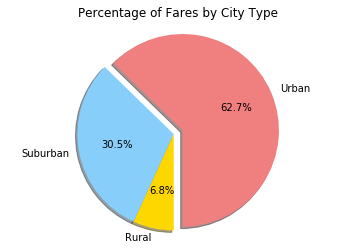

In [4]:
fare_df = df[['city', 'type', 'fare']].set_index('type')
fare_df = fare_df.groupby('type').sum()
fare_df_pct = fare_df.div(df.fare.sum())*100
fare_df_pct = fare_df_pct.sort_values('fare', ascending=False)

labels=['Urban', 'Suburban', 'Rural']
colors=['lightcoral', 'lightskyblue','gold']
explode=[.1, 0 ,0]

plt.pie(fare_df_pct, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=270, shadow=True)
plt.axis('equal')
plt.title('Percentage of Fares by City Type')
plt.savefig('Images/FaresByCityType.png', bbox_inches='tight')
plt.show()



## Total Rides by City Type

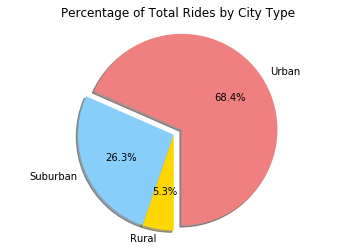

In [5]:
rides_df = df[['type', 'ride_id']].set_index('type')
rides_df = rides_df.groupby('type').count()
rides_df_pct = rides_df.div(len(df))*100
rides_df_pct = rides_df_pct.sort_values('ride_id', ascending=False)

labels=['Urban', 'Suburban', 'Rural']
colors=['lightcoral', 'lightskyblue','gold']
explode=[.1, 0 ,0]

plt.pie(rides_df_pct, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=270, shadow=True)
plt.axis('equal')
plt.title('Percentage of Total Rides by City Type')
plt.savefig('Images/TotalRidesByCityType.png', bbox_inches='tight')
plt.show()

## Total Drivers by City Type

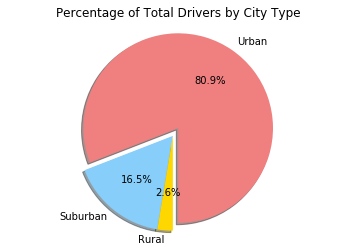

In [6]:
driver_df = df[['city', 'driver_count', 'type']].drop_duplicates('city')
driver_df_sum = driver_df.groupby('type').sum()
driver_df_pct = driver_df_sum.div(driver_df_sum.sum())*100

driver_df_pct = driver_df_pct.sort_values('driver_count', ascending=False)

labels=['Urban', 'Suburban', 'Rural']
colors=['lightcoral', 'lightskyblue','gold']
explode=[.1, 0 ,0]

plt.pie(driver_df_pct, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=270, shadow=True)
plt.axis('equal')
plt.title('Percentage of Total Drivers by City Type')
plt.savefig('Images/TotalDriversByCityType.png', bbox_inches='tight')
plt.show()